# K Nearest Neighbors Project 

In [11]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Get the Data

In [6]:
#Read the 'KNN_Project_Data csv file into a dataframe
df = pd.read_csv("KNN_Project_Data")

In [8]:
#Check the head of the dataframe
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since I did not have any information about the independent variables, I just did a large pairplot with seaborn.

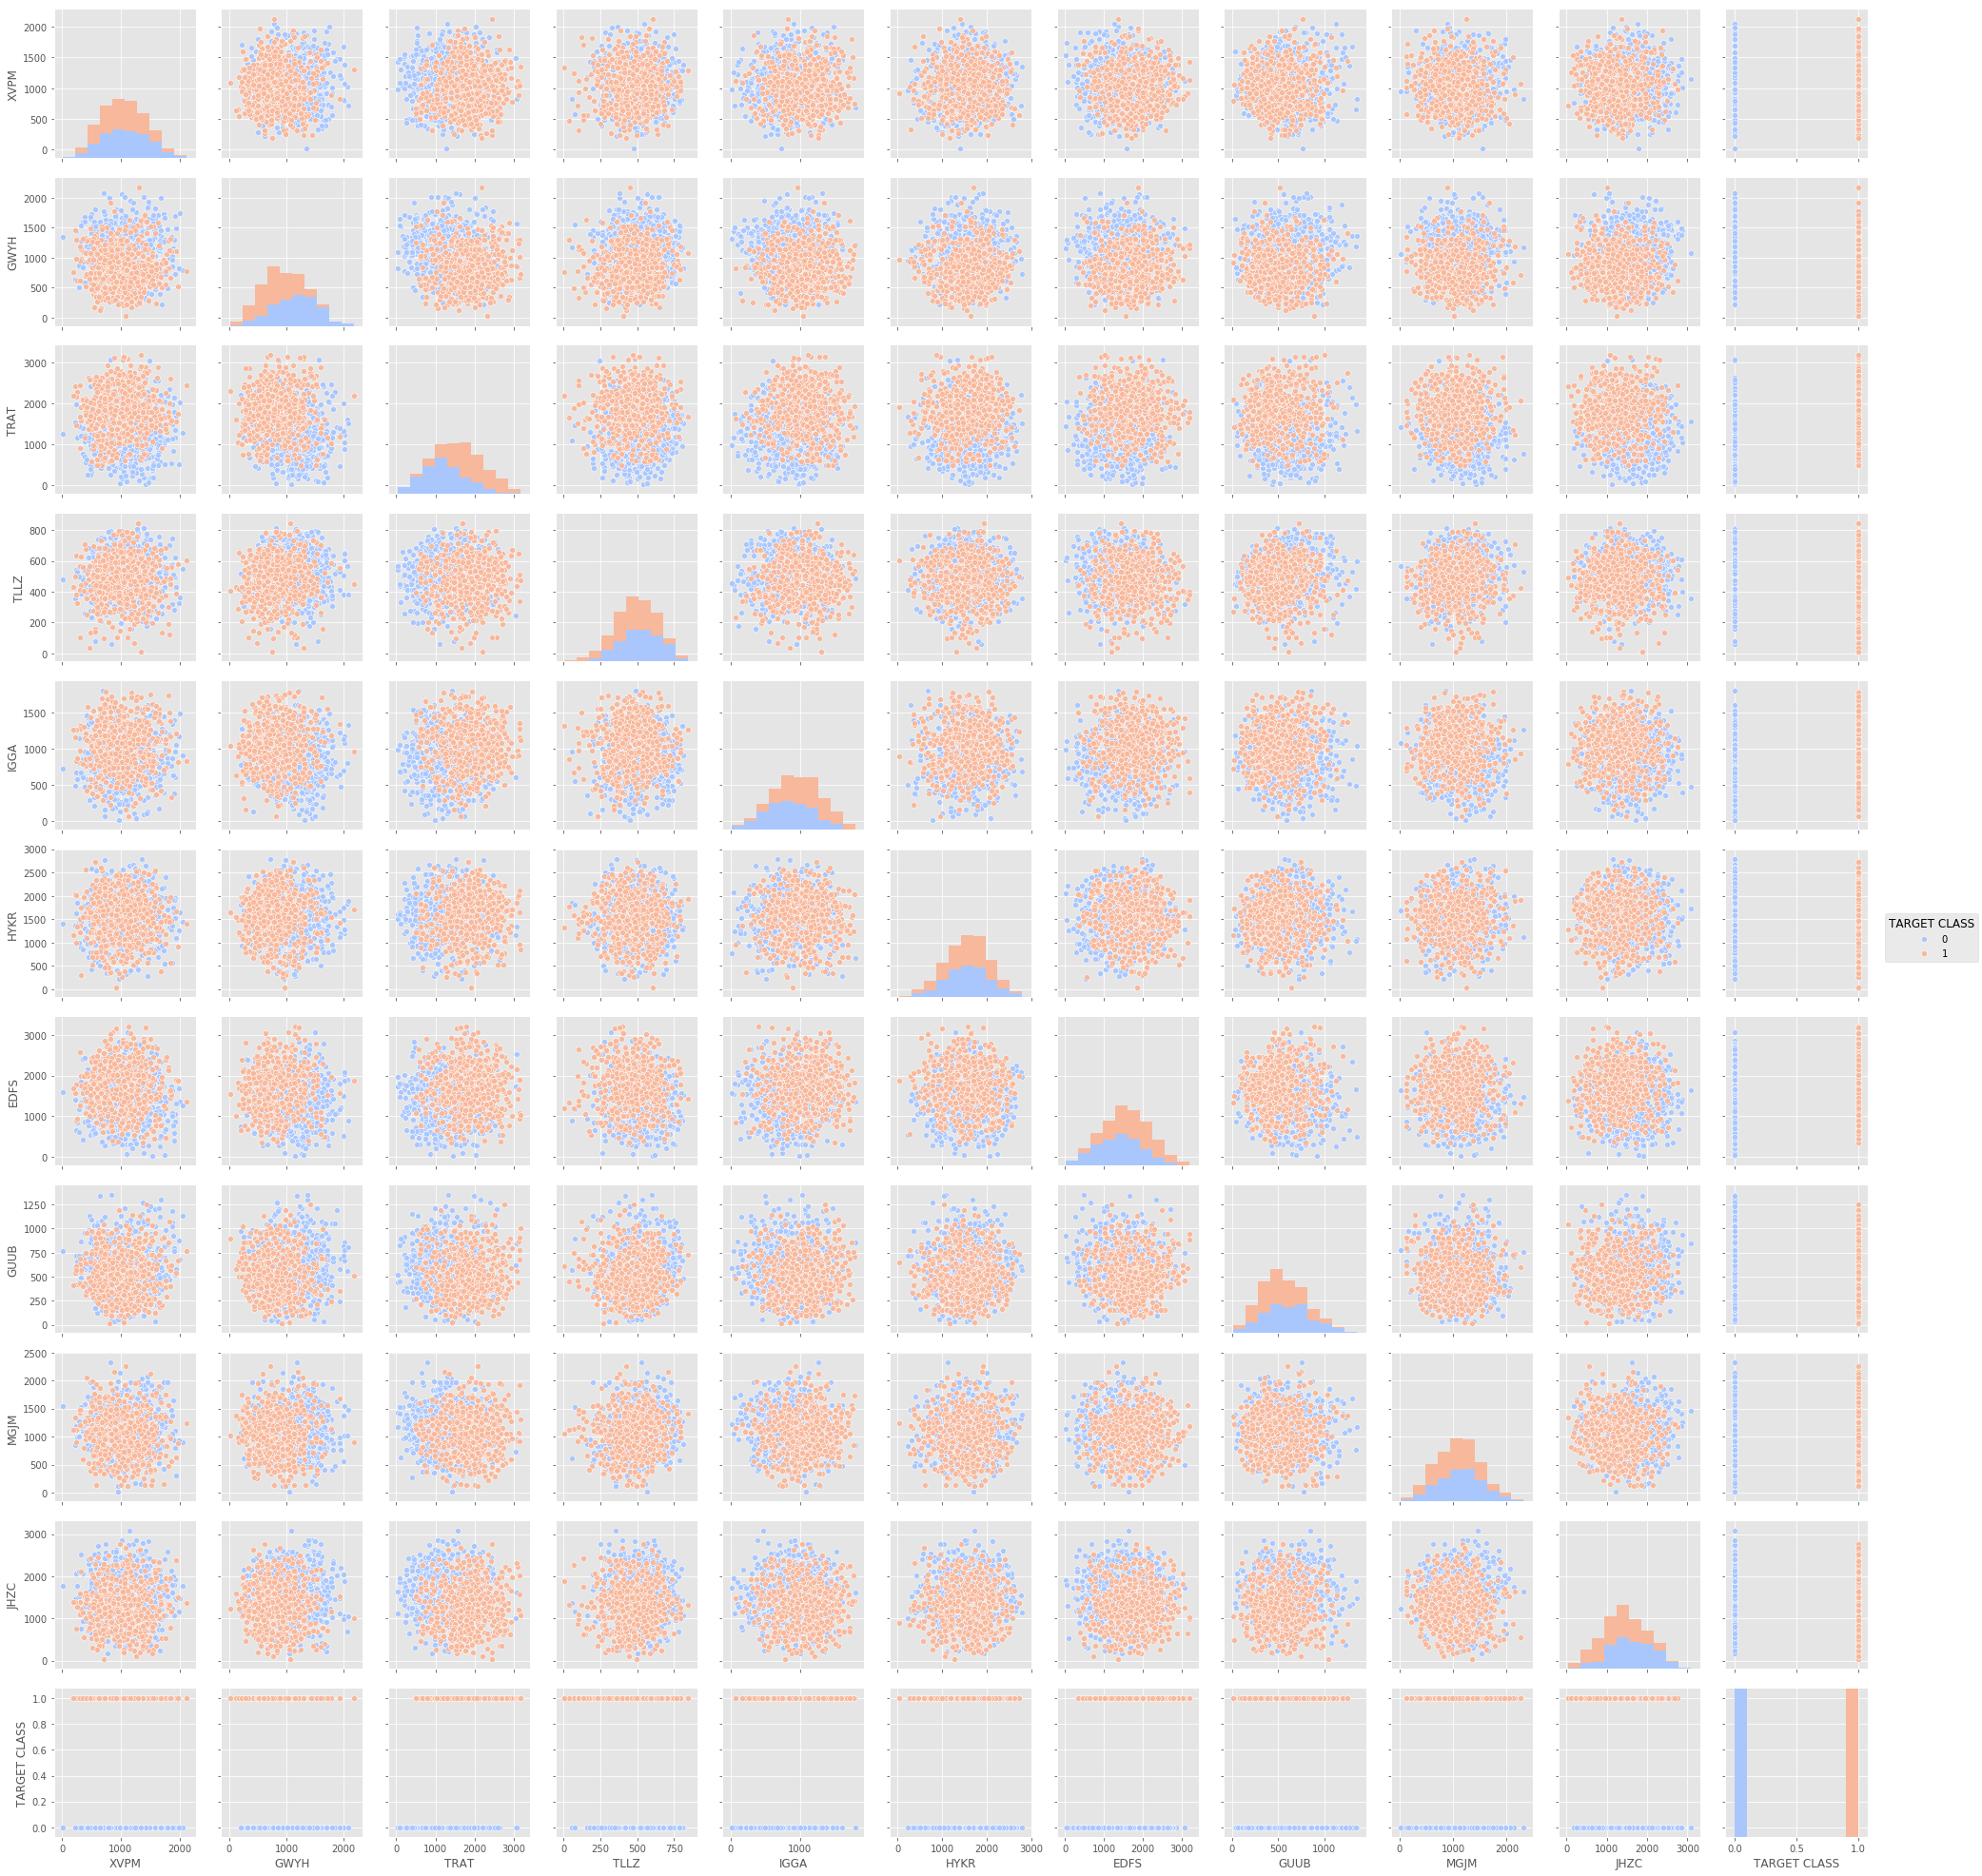

In [12]:
sns.pairplot(df,hue='TARGET CLASS', palette='coolwarm')

# Standardize the Variables

In [13]:
#Import StandardScaler from Scikit learn
from sklearn.preprocessing import StandardScaler

In [14]:
#Create a StandardScaler() object called scaler
scaler =  StandardScaler()

In [15]:
#Fit scaler to the features
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
#Use the .transform() method to transform the features to a scaled version
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [17]:
#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
#Use train_test_split to split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30, random_state=101)

# Using KNN

In [29]:
#Import KNeighborsClassifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#Create a KNN model instance with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
#Fit this KNN model to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations

In [32]:
#Use the predict method to predict values using your KNN model and X_test
pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
#Create a confusion matrix
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [35]:
#Create a classification report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



# Choosing a K Value

In [41]:
#Create a for loop that trains various KNN models with different k values

error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

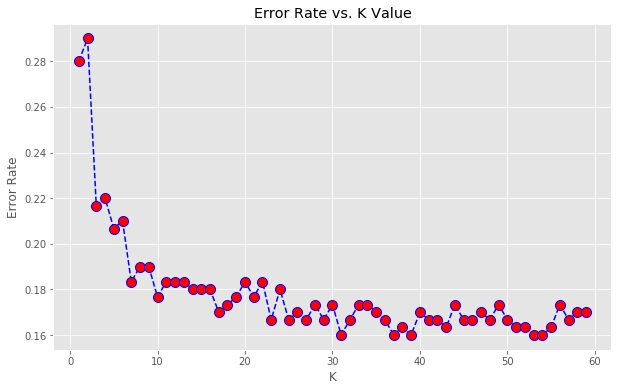

In [42]:
#Create plot using the information from the for loop
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [43]:
#Retrain your model with the best K value and re-do the classification report and the confusion matrix
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[124  28]
 [ 22 126]]


             precision    recall  f1-score   support

          0       0.85      0.82      0.83       152
          1       0.82      0.85      0.83       148

avg / total       0.83      0.83      0.83       300

